In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import re

In [9]:
df = pd.read_csv('data/SeoulBikeData.csv', encoding='euc-kr')
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [11]:
### 날짜에서 요일 파생변수 생성
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [12]:
### 요일 칼럼 생성
import datetime as dt

df["Weekdays"] = ((df["Date"] - pd.to_datetime('2016-01-01')).dt.days) % 7

df["Weekdays"] = df["Weekdays"].map({0:'Friday', 1:'Saturday', 2:'Sunday', 3:'Monday', 4:'Tuesday', 6:'Thursday', 5:'Wednesday'})

df["Weekdays"].head(50)


0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
5       Friday
6       Friday
7       Friday
8       Friday
9       Friday
10      Friday
11      Friday
12      Friday
13      Friday
14      Friday
15      Friday
16      Friday
17      Friday
18      Friday
19      Friday
20      Friday
21      Friday
22      Friday
23      Friday
24    Saturday
25    Saturday
26    Saturday
27    Saturday
28    Saturday
29    Saturday
30    Saturday
31    Saturday
32    Saturday
33    Saturday
34    Saturday
35    Saturday
36    Saturday
37    Saturday
38    Saturday
39    Saturday
40    Saturday
41    Saturday
42    Saturday
43    Saturday
44    Saturday
45    Saturday
46    Saturday
47    Saturday
48      Sunday
49      Sunday
Name: Weekdays, dtype: object

In [13]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


## 1. EDA

In [14]:
### 18시 / 20도 이상 30도 이하일 때 / 계절은 봄, 여름, 가을 / 휴일이 아닐 때
df[df['Rented Bike Count'] >= 2800].sort_values(by='Rented Bike Count', ascending=False)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekdays
4818,2018-06-19,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes,Tuesday
4866,2018-06-21,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes,Thursday
4650,2018-06-12,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes,Tuesday
4842,2018-06-20,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes,Wednesday
4458,2018-06-04,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes,Monday
4890,2018-06-22,3365,18,29.3,27,3.4,1977,8.3,1.24,0.0,0.0,Summer,No Holiday,Yes,Friday
4554,2018-06-08,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes,Friday
6810,2018-09-10,3298,18,25.9,42,1.1,2000,11.9,0.48,0.0,0.0,Autumn,No Holiday,Yes,Monday
6978,2018-09-17,3277,18,25.3,56,2.8,1992,15.8,0.54,0.0,0.0,Autumn,No Holiday,Yes,Monday
6858,2018-09-12,3256,18,27.0,44,1.4,2000,13.6,0.62,0.0,0.0,Autumn,No Holiday,Yes,Wednesday


In [15]:
df[df['Rented Bike Count'] >= 3000].describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0
mean,3223.774194,18.0,25.880645,48.258065,2.338710,1783.870968,13.738710,0.830323,0.0,0.0
std,121.618724,0.0,2.370291,10.551359,0.748633,363.047907,4.125181,0.313385,0.0,0.0
min,3016.000000,18.0,20.600000,27.000000,0.700000,931.000000,6.800000,0.300000,0.0,0.0
25%,3138.000000,18.0,24.550000,41.500000,1.900000,1847.500000,11.400000,0.560000,0.0,0.0
50%,3221.000000,18.0,26.000000,45.000000,2.400000,1987.000000,14.000000,0.800000,0.0,0.0
75%,3287.500000,18.0,27.050000,55.500000,2.850000,2000.000000,16.400000,1.085000,0.0,0.0
max,3556.000000,18.0,30.700000,77.000000,3.600000,2000.000000,23.000000,1.350000,0.0,0.0


In [16]:
### 1. 시간대별 자전거 대여량 평균은 어떻게 될까?
### 오전 8시, 오후 5시~오후9시까지
df.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='Hour'>

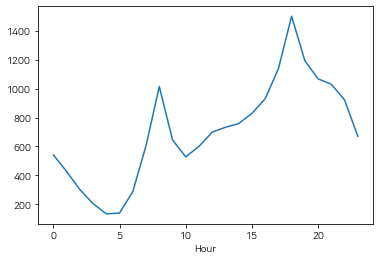

In [17]:
df.groupby('Hour')['Rented Bike Count'].mean().plot()

In [18]:
### 2. 휴일일 때와 휴일이 아닐 때 패턴이 달라질까?
### 휴일이 아닐 땐 큰 차이가 없다.
df[df['Holiday'] == 'No Holiday'].groupby('Hour')['Rented Bike Count'].mean()

Hour
0      545.365994
1      427.887608
2      301.512968
3      202.864553
4      132.809798
5      141.680115
6      295.590778
7      626.325648
8     1050.311239
9      659.821326
10     532.971182
11     605.564841
12     703.478386
13     734.832853
14     760.112392
15     833.409222
16     938.040346
17    1154.487032
18    1539.354467
19    1219.694524
20    1087.389049
21    1049.766571
22     939.706052
23     682.495677
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='Hour'>

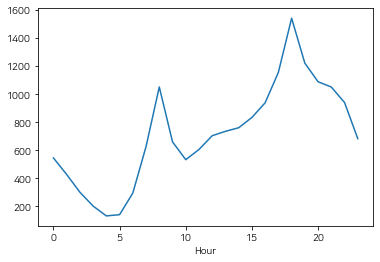

In [19]:
# 평일이 전체 데이터와 크게 차이가 나지 않는 이유는 평일이 데이터 값의 대부분을 차지하고 있기 때문
# 분석, 예측할 땐 반드시 평일과 휴일을 나눠서 분석하도록 해야할 것으로 판단됩니다.
df[df['Holiday'] == 'No Holiday'].groupby('Hour')['Rented Bike Count'].mean().plot()

In [20]:
### 휴일일 땐 차이가 있다.
df[df['Holiday'] == 'Holiday'].groupby('Hour')['Rented Bike Count'].mean()

Hour
0     466.166667
1     393.333333
2     303.888889
3     212.333333
4     128.388889
5      89.000000
6     132.833333
7     214.277778
8     348.500000
9     379.222222
10    428.555556
11    510.000000
12    621.611111
13    702.666667
14    734.000000
15    747.777778
16    787.611111
17    830.500000
18    800.666667
19    721.944444
20    713.777778
21    678.333333
22    596.833333
23    451.944444
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='Hour'>

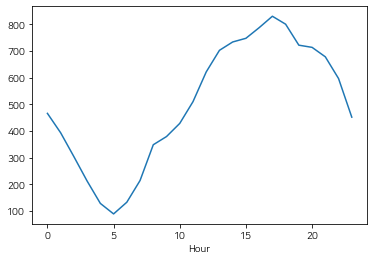

In [21]:
df[df['Holiday'] == 'Holiday'].groupby('Hour')['Rented Bike Count'].mean().plot()

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


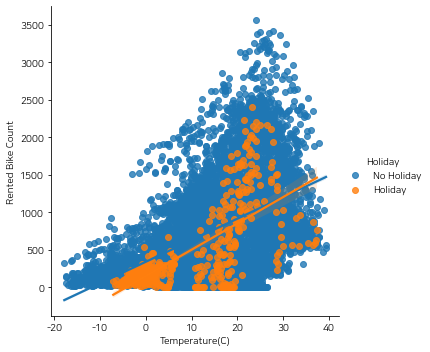

In [22]:
### 2. 너무 덥거나 추우면 자전거 대여는 잘 안하지 않을까?
### 기온, 자전거 대여량 모두 연속변수
### 두 연속변수의 관계를 파악할 땐 scatter가 가장 적합할 것으로 보입니다. 더불어 가능하다면 상관계수도 파악해보겠습니다.
### 가장 큰 변수는 시간, 모든 시간별 대여량이 기록되어 있어 밑에 깔려있는 경우도 있음
ax = sns.lmplot('Temperature(C)', 'Rented Bike Count', hue = 'Holiday', data = df)

In [23]:
# 추운 겨울엔 대여량이 극도로 줄어든다.
# 반대로 더운 여름엔 대여량이 오히려 획기적으로 늘어난다.
df.groupby('Seasons')['Rented Bike Count'].mean()

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

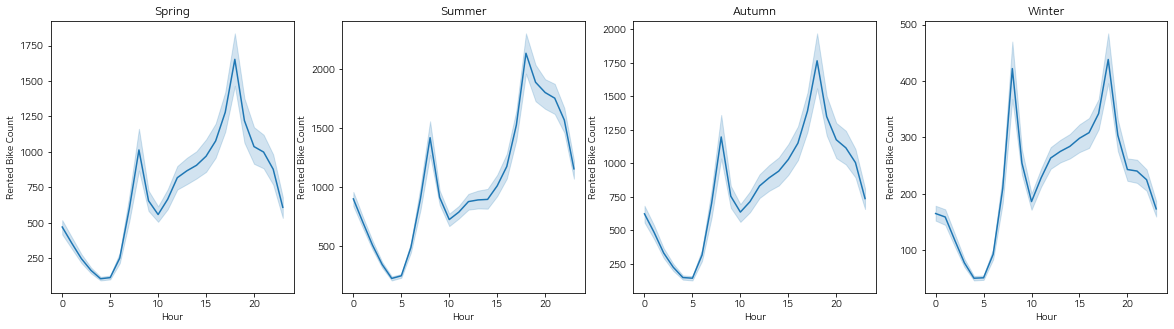

In [24]:
# 계절별 시간대 자전거 대여량 파악해보기
# 월화수목금은 No Holiday / 토일은 Holiday와 대여량 패턴이 비슷합니다.
# 참고 : 그래프 왼편에 대여량 수치값이 다르다. 따라서, 평균값 크기처럼 여름, 가을에 대여량이 많음을 알 수 있습니다.

f, ax = plt.subplots(1,4,figsize=(20,5))

seasons_list = ['Spring', 'Summer', 'Autumn', 'Winter']

for i in range(len(seasons_list)):
    sns.lineplot("Hour", "Rented Bike Count", data = df[df['Seasons'] == seasons_list[i]], ax = ax[i%4])
    ax[i%4].set_title(seasons_list[i])

In [25]:
### 3. 요일별 자전거 대여량 평균 어떻게 되나?
df.groupby('Weekdays')['Rented Bike Count'].mean()

Weekdays
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: Rented Bike Count, dtype: float64

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekdays', ylabel='Rented Bike Count'>

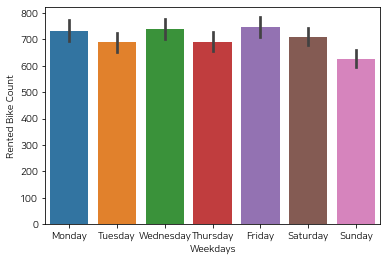

In [26]:
sns.barplot('Weekdays', 'Rented Bike Count', data=df, order=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

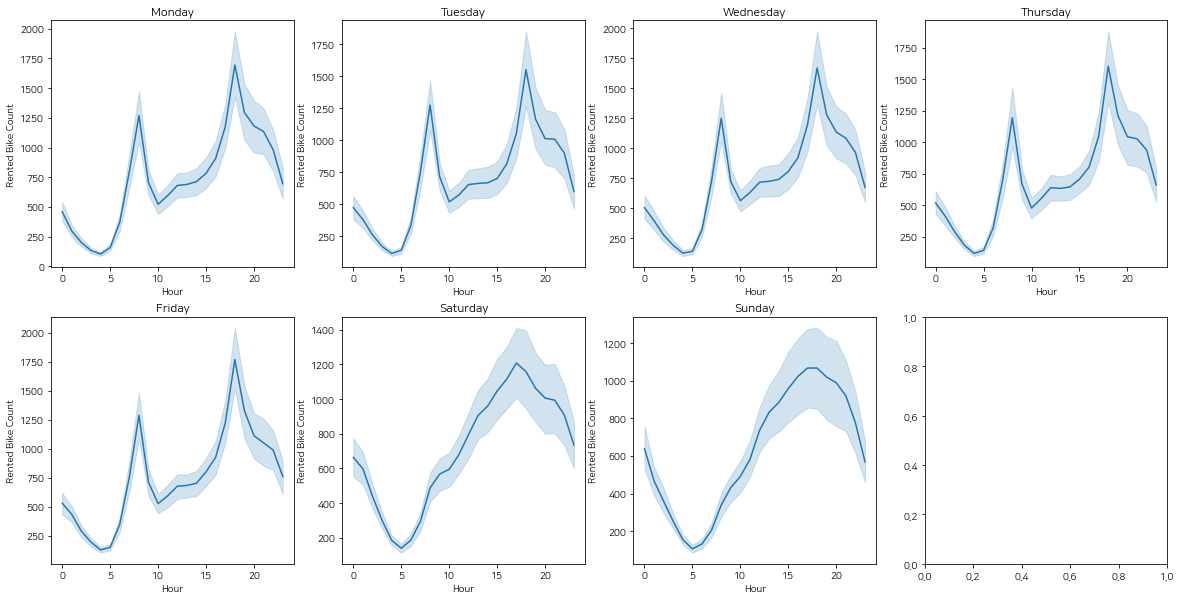

In [27]:
# 요일별 시간대 자전거 대여량 파악
# 월화수목금은 No Holiday / 토일은 Holiday와 대여량 패턴이 비슷합니다

f, ax = plt.subplots(2,4,figsize=(20,10))

weekdays_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(len(weekdays_list)):
    sns.lineplot("Hour", "Rented Bike Count", data = df.loc[df.Weekdays == weekdays_list[i]], ax = ax[i//4, i%4])
    ax[i//4, i%4].set_title(weekdays_list[i])

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekdays', ylabel='Rented Bike Count'>

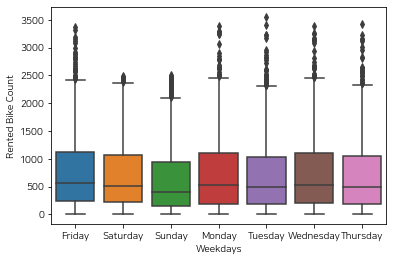

In [28]:
### 4. 요일별, 시간대별, 휴일별, 계절별 이상치 파악
### 이상치 파악엔 Boxplot, Violinplot이 최고
### 약 2300개 이상 대여되면 통계적으로 특별한 일이라고 봐야

sns.boxplot('Weekdays', 'Rented Bike Count', data=df)

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekdays', ylabel='Rented Bike Count'>

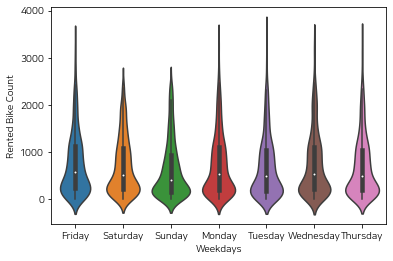

In [29]:
### 분산, 표준편차부터 데이터 분포는 비슷합니다. 
sns.violinplot('Weekdays', 'Rented Bike Count', data=df)

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

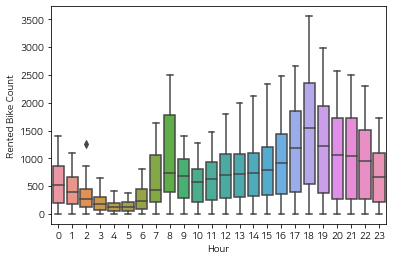

In [30]:
# 시간대별 대여량은 통계적으로 정상범위 내에서
# 단 새벽 2시에 일반적이지 않게 1300대 이상 대여된적이 있다.
sns.boxplot('Hour', 'Rented Bike Count', data=df)

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

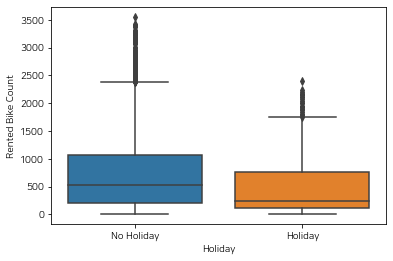

In [31]:
# 평일엔 2500대 이상 대여되면 통계적으로 특이점 있는 것으로 판단
# 주말엔 1700대 이상 대여되면 통계적으로 특이점 있는 것으로 판단
sns.boxplot('Holiday', 'Rented Bike Count', data=df)

/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

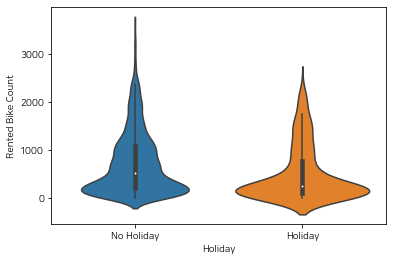

In [32]:
###
sns.violinplot('Holiday', 'Rented Bike Count', data=df)

## 2. PreProcessing
- ML / DL 위한 전처리
- 1. datatype(int, float, object)
- 2. 데이터표준화(Scaling)
- 3. 원핫인코딩(판다스 겟더미 사용)

### 1. datatype 변경

In [33]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [34]:
# 1. Datatype 수정 :: datetime은 머신러닝, 딥러닝으로 돌릴 수 없음. 연/월/일 뽑고 date는 지워주겠습니다.
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekdays,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12,1


In [35]:
# 숫자이지만 카테고리형인 칼럼들 category로 만들어줘야합니다.
Category_list = ['Hour', 'Year', 'Month', 'Day']
for column in Category_list:
    df[column] = df[column].astype('category')

del df['Date']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Rented Bike Count         8760 non-null   int64   
 1   Hour                      8760 non-null   category
 2   Temperature(C)            8760 non-null   float64 
 3   Humidity(%)               8760 non-null   int64   
 4   Wind speed (m/s)          8760 non-null   float64 
 5   Visibility (10m)          8760 non-null   int64   
 6   Dew point temperature(C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)   8760 non-null   float64 
 8   Rainfall(mm)              8760 non-null   float64 
 9   Snowfall (cm)             8760 non-null   float64 
 10  Seasons                   8760 non-null   object  
 11  Holiday                   8760 non-null   object  
 12  Functioning Day           8760 non-null   object  
 13  Weekdays                  8760 non-null   object

### 2. 원핫인코딩

In [37]:
df = pd.get_dummies(df)
df

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 93 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Temperature(C)            8760 non-null   float64
 2   Humidity(%)               8760 non-null   int64  
 3   Wind speed (m/s)          8760 non-null   float64
 4   Visibility (10m)          8760 non-null   int64  
 5   Dew point temperature(C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)   8760 non-null   float64
 7   Rainfall(mm)              8760 non-null   float64
 8   Snowfall (cm)             8760 non-null   float64
 9   Hour_0                    8760 non-null   uint8  
 10  Hour_1                    8760 non-null   uint8  
 11  Hour_2                    8760 non-null   uint8  
 12  Hour_3                    8760 non-null   uint8  
 13  Hour_4                    8760 non-null   uint8  
 14  Hour_5  

### 3. 데이터표준화

In [39]:
# 표준화해야할 대상은 여기까지
# df 모두를 scaler에 넣어 진행하면 원핫인코딩한 데이터까지 값이 바뀌어버림
df.iloc[:, 0:9]

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
# 결과값은 다시 원래값으로 돌릴 수 있어야하기 때문에 따로 진행하는 것이 편합니다.

train_Scaler = StandardScaler()
train_Scaler.fit(df.iloc[:, 1:9])
train_std = train_Scaler.transform(df.iloc[:, 1:9])
train_std

target_Scaler = StandardScaler()
target_Scaler.fit(df['Rented Bike Count'].values.reshape(-1, 1))
target_std = target_Scaler.transform(df['Rented Bike Count'].values.reshape(-1, 1))
target_std

array([[-0.69865046],
       [-0.77617457],
       [-0.82423951],
       ...,
       [-0.0164383 ],
       [ 0.01147038],
       [-0.18699134]])

In [118]:
train_std = pd.DataFrame(train_std, columns=df.iloc[:, 1:9].columns)

In [121]:
train_std

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891
...,...,...,...,...,...,...,...,...
8755,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891
8756,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891
8757,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891
8758,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891


In [122]:
target_std

array([[-0.69865046],
       [-0.77617457],
       [-0.82423951],
       ...,
       [-0.0164383 ],
       [ 0.01147038],
       [-0.18699134]])

In [123]:
train_std.columns

Index(['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object')

In [125]:
### train_std 값을 df 값에 덮어씌운다. 그러면 원핫인코딩을 제외한 칼럼들 표준화 가능하다.
### 반복문을 이용해 한번에 덮어씌워봤습니다.
df['Rented Bike Count'] = target_std

for column in train_std.columns:
    df[column] = train_std[column]

df


,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,-0.698650,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.776175,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.824240,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.926571,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.971535,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.462661,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8756,0.092095,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8757,-0.016438,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8758,0.011470,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 93 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   float64
 1   Temperature(C)            8760 non-null   float64
 2   Humidity(%)               8760 non-null   float64
 3   Wind speed (m/s)          8760 non-null   float64
 4   Visibility (10m)          8760 non-null   float64
 5   Dew point temperature(C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)   8760 non-null   float64
 7   Rainfall(mm)              8760 non-null   float64
 8   Snowfall (cm)             8760 non-null   float64
 9   Hour_0                    8760 non-null   uint8  
 10  Hour_1                    8760 non-null   uint8  
 11  Hour_2                    8760 non-null   uint8  
 12  Hour_3                    8760 non-null   uint8  
 13  Hour_4                    8760 non-null   uint8  
 14  Hour_5  

In [77]:
df.to_csv('data/bike_encoding.csv', encoding='utf-8')

## 3. Analysis
- 종속변수(결과) : Rented Bike Count(양적변수)
- 독립변수(원인) : Other Columns(양적변수 + 질적변수)
- Regression로 진행, 설명력 중심으로 예측정확도를 판단하겠습니다.
- 결과1 : [XGBRegressor, LightGBMRegressor, SVR(kernel = 'rbf') = 90% 설명력]Linear보다 tree구조 회귀분석에서 더 좋은 성능을 보였습니다. LSTM 시계열 분석에서도 좋은 성적을 거둘 수 있을 것으로 예상됩니다.
- 결과2 : 

In [2]:
data = pd.read_csv('data/bike_encoding.csv', index_col=0)
data

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,-0.698650,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.776175,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.824240,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.926571,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.971535,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.462661,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8756,0.092095,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8757,-0.016438,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0
8758,0.011470,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV # 데이터 나누기, 점검 및 훈련
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


### 1. 데이터 훈련용/테스트용으로 나누기

In [4]:
### 1. 훈련용/테스트용 분리
# 결과변수는 data['Rented Bike Count']로 data.iloc[:, 0]으로 부를 수 있습니다.
# 원인변수는 이 외 데이터로 data.iloc[:, 1:]로 부를 수 있습니다.

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6570, 92) (2190, 92) (6570,) (2190,)


### 2. 다중선형회귀분석

In [5]:
### 2. 다중선형회귀분석
# 설명력 70 / Not bad

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

기울기 : [ 3.28165719e-01 -2.67085374e-01  1.10035072e-02  5.61866005e-02
  2.14474569e-01  7.03949457e-02 -9.39714245e-02  1.61990303e-02
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  1.21033508e+11  1.21033508e+11  1.21033508e+11  1.21033508e+11
  4.10340677e+12  9.60623387e+12  3.82457943e+12  6.67642131e+12
 -1.57256736e+13 -1.57256736e+13 -1.98678829e+11 -1.98678829e+11
 -4.92662302e+12 -4.92662302e+12 -4.92662302e+12 -4.92662302e+12
 -4.92662302e+12 -4.92662302e+12 -4.92662302e+12 -2.66235742e+12
  4.56683737e+11 -1.20887250e+12 -1.20887250e+12 -4.13868506e+12
 -4.13868506e+12 -4.13868506e+12  1.64296938e+12  1.64296938e+12
  1.64296938e+12  1.36414205e+12  1.36414205e+12  1.36414205e+12
  1.91016865e+12 -4

### 3. 릿지회귀분석
- L2 규제(regularization) = Norm 2 방식(최단거리)으로 규제
    + 너무 복잡하니 조금 단순하게 만들어주겠다.
- MSE(Mean Square Error : 평균제곱오차(잔차제곱합을 의미)) 항에 Penelty 추가 // 1/n * sum((yi - yi^)^2 for i in n) = mean(yi - yi^) + "alpha" * sum((wi^2) for i in n)
    + 회귀선에서 많이 벗어나면 패널티를 준다
    + 실제값에서 예측값을 뻬고 제곱을 해준 것의 평균(MSE)
    + 가중치의 제곱의 합(L2 규제)
- "alpha"를 크게 하면 Penelty가 커지고 "alpha"를 작게 하면 Penelty가 줄어든다.
    + "alpha"가 유일한 하이퍼 파라미터(조절값)
- 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과 -> 과대적합 방지에 유리?

In [12]:
rg = Ridge(alpha=0.01) #alpha값 10 ~ 0.01 조절해도 같은 설명력 보임
rg.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(rg.coef_, rg.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))

기울기 : [ 3.17326368e-01 -2.68778601e-01  1.09857547e-02  5.54445735e-02
  2.19726693e-01  7.12335125e-02 -9.41494995e-02  1.64997381e-02
 -7.84864202e-02 -2.27342904e-01 -4.13827143e-01 -5.07847552e-01
 -6.14891591e-01 -5.95135185e-01 -3.16577862e-01  1.36366564e-01
  6.67382790e-01  8.07726736e-03 -3.57363700e-01 -3.88855583e-01
 -3.11831931e-01 -3.28690660e-01 -3.29928263e-01 -1.92787938e-01
  1.02021858e-02  3.93408793e-01  1.11075389e+00  6.94427431e-01
  5.81943723e-01  5.55140652e-01  4.32195884e-01  7.36675511e-02
  1.81852327e-01  3.28587297e-02 -4.97373938e-02 -1.64973663e-01
 -1.14679352e-01  1.14679352e-01 -7.22521231e-01  7.22521231e-01
  8.17897452e-02 -3.50749544e-03 -2.58988200e-02 -1.35166382e-01
  3.51781680e-02  2.24443089e-02  2.51604750e-02  1.91888977e-02
 -1.91888977e-02 -5.08880754e-02 -1.33274486e-01 -1.52109868e-01
 -1.84610076e-02  2.03429605e-01  4.49031249e-01 -1.24469999e-01
 -3.74298644e-01 -4.08089175e-02  1.65897562e-01  5.67636828e-02
  1.91888977e-02 -6

### 4. 라쏘회귀분석
- L1 규제(regularization) = Norm 1 방식(이동한 거리의 합))으로 규제
    + 너무 복잡하니 조금 단순하게 만들어주겠다.
- MSE(Mean Square Error : 평균제곱오차(잔차제곱합을 의미)) 항에 Penelty 추가 // 1/n * sum((yi - yi^)^2 for i in n) = mean(yi - yi^) + "alpha" * sum(|wi| for i in n)
    + 회귀선에서 많이 벗어나면 패널티를 준다
    + 실제값에서 예측값을 뻬고 제곱을 해준 것의 평균(MSE)
    + 가중치에 거리 절대값의 합을 곱해준다.(L1 규제)
    + 릿지와의 차이? 거리를 절대값으로 해주면 0도 생김. 이렇게 되면 관련성이 약하거나 없는 변수는 자동으로 지워주는 특성을 지니게 된다.  
- "alpha"를 크게 하면 Penelty가 커지고 "alpha"를 작게 하면 Penelty가 줄어든다.
    + "alpha"가 유일한 하이퍼 파라미터(조절값)
- 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과 -> 과대적합 방지에 유리?

In [13]:
ls = Lasso(0.01) #alpha값 10 ~ 0.01 조절하면 사용하는 변수는 달라지지만 설명력은 같다.
ls.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(ls.coef_, ls.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))
print("사용한 변수의 수: {}".format(np.sum(ls.coef_ != 0)))

기울기 : [ 5.13153688e-01 -2.22236569e-01  3.35132097e-02  3.27751047e-02
  0.00000000e+00 -2.97919608e-02 -8.87177331e-02  4.30054413e-03
 -0.00000000e+00 -0.00000000e+00 -1.27467435e-01 -2.19621285e-01
 -3.08227371e-01 -2.74087074e-01 -1.30767388e-02  0.00000000e+00
  5.18774286e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.34824941e-01  8.94008008e-01  4.98238634e-01
  3.51107666e-01  3.60366678e-01  2.33915041e-01  0.00000000e+00
  1.94108884e-01  0.00000000e+00 -0.00000000e+00 -1.61177063e-01
 -3.27994115e-02  6.31146460e-16 -1.06344556e+00  6.43985086e-16
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.29279640e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.86530852e-04 -0.00000000e+00
  0.00000000e+00  1.67476417e-01  3.53906586e-01 -0.00000000e+00
 -2.21253206e-01 -0.00000000e+00  5.20998617e-02  0.00000000e+00
  0.00000000e+00 -0

### 5. 비선형 SVR
- SVM은 분류쪽(로지스틱회귀분석)에서 더 강력한 성능을 발휘하나 확인차 진행해봅니다.
- SVR은 비선형 회귀에 적합하며 시계열 파트에서 좋은 결과 보여줍니다.
- 결과 : rbf 커널에서 좋은 설명력 보임 - 이유는? 원인 파악해 공부해보기

In [16]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel='linear'))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[10, 1.0], 'model__epsilon':[1, 0.1]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=3)

gs.fit(X_train, y_train)
print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))

# gs.best_params_에 최적의 C값과 감마값 들어있습니다.
# {'model__C': 1.0, 'model__gamma': 'scale'}
# gs.best_score_에 최적의 Score 들어있음

svr_linear = SVR(kernel='linear', C=gs.best_params_['model__C'], gamma=gs.best_params_['model__gamma'])
# 그리드서치로 얻은 최적의 하이퍼파라미터 바로 적용할 수 있게 C와 gamma에 gs.best_params값을 바로 입력했습니다.
svr_linear.fit(X_train, y_train)
pred = svr_linear.predict(X_test)
 
print("훈련 결과 : {}".format(svr_linear.score(X_train, y_train)))
print("점검 결과 : {}".format(svr_linear.score(X_test, y_test)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV 파라미터 : {'model__C': 1.0, 'model__epsilon': 0.1, 'model__gamma': 'scale'}
GridSearchCV 결과 : 0.6839244950818409
훈련 결과 : 0.6929286054630401
점검 결과 : 0.6978567189062771


In [6]:
### ok
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel='rbf'))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[100 ,10], 'model__epsilon':[1, 0.1]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=3)

gs.fit(X_train, y_train)
print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))

svr_rbf = SVR(kernel='rbf', C=gs.best_params_['model__C'], gamma=gs.best_params_['model__gamma'], epsilon=gs.best_params_['model__epsilon'])
svr_rbf.fit(X_train, y_train)
pred = svr_rbf.predict(X_test)

print("훈련 결과 : {}".format(svr_rbf.score(X_train, y_train)))
print("점검 결과 : {}".format(svr_rbf.score(X_test, y_test)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV 파라미터 : {'model__C': 10, 'model__epsilon': 0.1, 'model__gamma': 'scale'}
GridSearchCV 결과 : 0.8948520945108571
훈련 결과 : 0.9831038772042139
점검 결과 : 0.9408510493145795


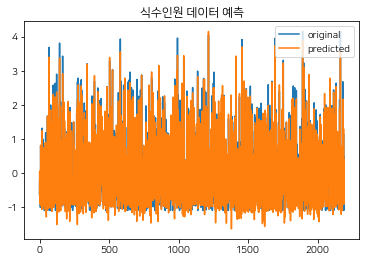

In [30]:
ax = range(len(y_test))
plt.plot(ax, y_test, label="original")
plt.plot(ax, pred, label="predicted")
plt.title("자전거 대여량 예측")
plt.legend()
plt.show()

In [19]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel='poly'))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[10, 1.0], 'model__epsilon':[0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=3)

gs.fit(X_train, y_train)
print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))

svr_poly = SVR(kernel='poly', C=gs.best_params_['model__C'], gamma=gs.best_params_['model__gamma'], epsilon=gs.best_params_['model__epsilon'])
svr_poly.fit(X_train, y_train)
pred = svr_poly.predict(X_test)

print("훈련 결과 : {}".format(svr_poly.score(X_train, y_train)))
print("점검 결과 : {}".format(svr_poly.score(X_test, y_test)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV 파라미터 : {'model__C': 10, 'model__epsilon': 0.01, 'model__gamma': 'auto'}
GridSearchCV 결과 : 0.876583604963808
훈련 결과 : 0.6110727205437182
점검 결과 : 0.5813967262183586


### 6. 선형 SVR

In [27]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", LinearSVR())])
params = [{'model__C':[100 ,10, 1.0], 'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=3)

gs.fit(X_train, y_train)
print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))

linear_svr = LinearSVR(C=gs.best_params_['model__C'], epsilon=gs.best_params_['model__epsilon'])
linear_svr.fit(X_train, y_train)
pred = linear_svr.predict(X_test)

print("훈련 결과 : {}".format(linear_svr.score(X_train, y_train)))
print("점검 결과 : {}".format(linear_svr.score(X_test, y_test)))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/s

GridSearchCV 파라미터 : {'model__C': 1.0, 'model__epsilon': 0.1}
GridSearchCV 결과 : 0.6818336242085952
훈련 결과 : 0.6931068381423725
점검 결과 : 0.697741989173413


/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hoon/miniforge3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 7. XGBRegressor

In [31]:
### ok
param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1]
}
model = XGBRegressor()
gs = GridSearchCV(estimator=model, param_grid=param, cv=3, 
                           scoring='neg_mean_squared_error',
                           n_jobs=multiprocessing.cpu_count())

gs.fit(X_train, y_train)
print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))


model = XGBRegressor(n_estimators=gs.best_params_['n_estimators'], colsample_bylevel=gs.best_params_['colsample_bylevel'], learning_rate=0.1, colsample_bytree=gs.best_params_['colsample_bytree'], max_depth=gs.best_params_['max_depth'])
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))


GridSearchCV 파라미터 : {'colsample_bylevel': 1, 'colsample_bytree': 1, 'max_depth': 4, 'n_estimators': 500}
GridSearchCV 결과 : -0.07896776971711529
훈련 결과 : 0.9636310039592516
점검 결과 : 0.9193649957506321


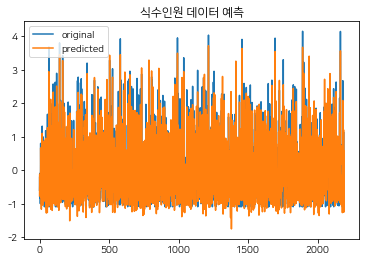

In [32]:
ax = range(len(y_test))
plt.plot(ax, y_test, label="original")
plt.plot(ax, pred, label="predicted")
plt.title("자전거 대여량 예측")
plt.legend()
plt.show()

### 8. LightGBMRegressor
- 성적 상당히 좋으나 과적합 보이는 것이 아쉽습니다.
- 차후 해결방안 공부해 과적합 해결해보겠습니다.

In [37]:
### ok
params = {
    'num_leaves': [26, 27, 28, 29],
    'learning_rate': [0.07, 0.05],
    'max_depth': [-1, -2, -3],
    'n_estimators': [1000, 2000, 3000],
}

gs = GridSearchCV(LGBMRegressor(), params, scoring='neg_mean_squared_error', cv=3, n_jobs=multiprocessing.cpu_count())
gs.fit(X_train, y_train)

print("GridSearchCV 파라미터 : {}".format(gs.best_params_))
print("GridSearchCV 결과 : {}".format(gs.best_score_))

model = LGBMRegressor(learning_rate=gs.best_params_['learning_rate'], max_depth=gs.best_params_['max_depth'], n_estimators=gs.best_params_['n_estimators'], num_leaves=gs.best_params_['num_leaves'])

model.fit(X_train, y_train)
pred = model.predict(X_test)
print("훈련결과 : {}".format(model.score(X_train, y_train)))
print("점검결과 : {}".format(model.score(X_test, y_test)))

GridSearchCV 파라미터 : {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 3000, 'num_leaves': 28}
GridSearchCV 결과 : -0.06702090074973066
훈련결과 : 0.9983061455323307
점검결과 : 0.9387754577251258


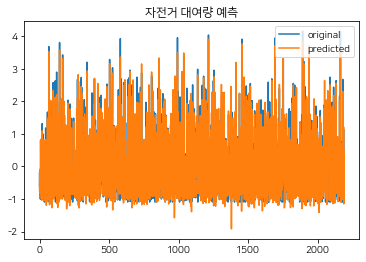

In [38]:
ax = range(len(y_test))
plt.plot(ax, y_test, label="original")
plt.plot(ax, pred, label="predicted")
plt.title("자전거 대여량 예측")
plt.legend()
plt.show()

## 4. Return

In [7]:
### 가장 Score가 좋았던 svr(kernel ver.rbf)로 실제 값을 다시 리턴해보겠습니다.
best_params = {'model__C': 10, 'model__epsilon': 0.1, 'model__gamma': 'scale'}
svr_rbf = SVR(kernel='rbf', C=best_params['model__C'], gamma=best_params['model__gamma'], epsilon=best_params['model__epsilon'])
svr_rbf.fit(X_train, y_train)
pred = svr_rbf.predict(X_test)

print("훈련 결과 : {}".format(svr_rbf.score(X_train, y_train)))
print("점검 결과 : {}".format(svr_rbf.score(X_test, y_test)))

훈련 결과 : 0.9831038772042139
점검 결과 : 0.9408510493145795


In [41]:
# 데이터 통짜로 표준화했다가 오류나서 종속변수/독립변수들 따로 표준화하고 진행
# 오류 나는 이유는 array가 같은 배열로 진행되어야하기 때문
rent_pred = target_Scaler.inverse_transform(pred.reshape(-1, 1))
rent_real = target_Scaler.inverse_transform(y_test.values.reshape(-1, 1))

In [42]:
rent_pred

array([[ 297.91645027],
       [ 745.15696482],
       [ 125.05471033],
       ...,
       [ 965.04060762],
       [ 114.68405919],
       [1531.50864836]])

In [43]:
rent_real

array([[ 320.],
       [ 580.],
       [ 226.],
       ...,
       [1016.],
       [   0.],
       [1430.]])

In [44]:
# 오차는 평균 7대 정도
np.average(rent_pred - rent_real)

6.838688310052321

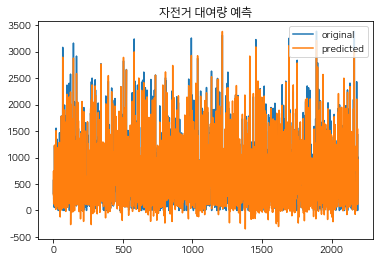

In [140]:
ax = range(len(y_test))
plt.plot(ax, rent_real, label="original")
plt.plot(ax, rent_pred, label="predicted")
plt.title("자전거 대여량 예측")
plt.legend()
plt.show()

In [46]:
df_pred = pd.DataFrame(rent_pred)
df_pred

,0
0,297.916450
1,745.156965
2,125.054710
3,176.299100
4,659.008025
...,...
2185,179.843311
2186,329.924092
2187,965.040608
2188,114.684059
